# **Exploring Image Classification Dynamics**

#### This project delves into the intricacies of transfer learning and its pivotal role in image classification. The primary objective is to juxtapose the outcomes of employing transfer learning against training a model from the ground up for an identical image classification task.

#### Utilizing the CIFAR10 dataset, which comprises small images, forms the cornerstone of this exploration. This dataset serves as a robust testing ground to gauge the efficacy of VGG16 in comparison to a traditional CNN model.

In [ ]:
# Importing Necessary Libraries
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [ ]:
# Importing the CIFAR-10 Dataset
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Checking the shape of the imported data
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

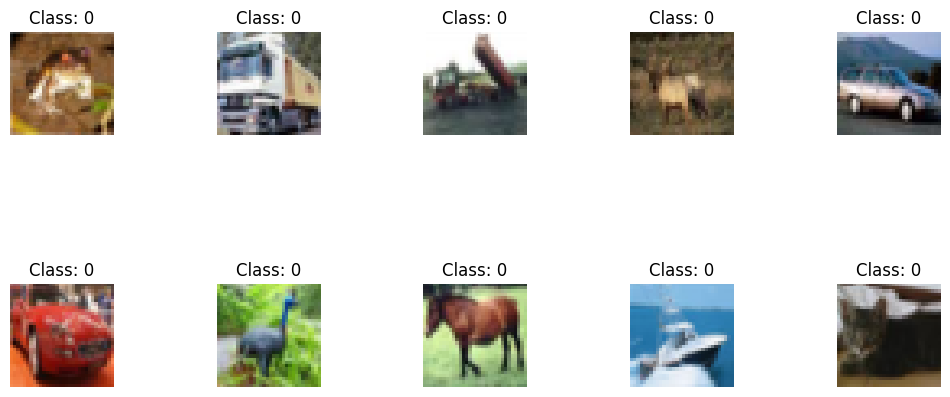

In [ ]:
# Visualizing the images
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.ravel()

for i in np.arange(0, 10):
    axes[i].imshow(X_train[i])
    axes[i].set_title(f"Class: {y_train[i].argmax()}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)
plt.show()

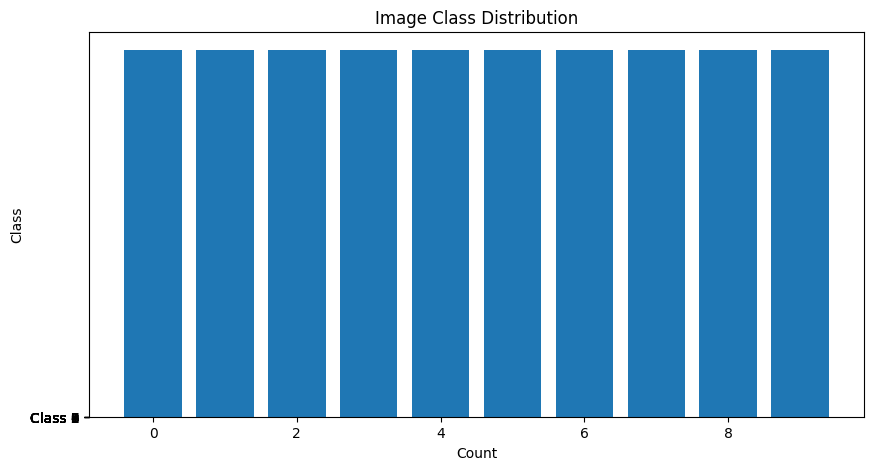

In [ ]:
# Checking the Class distribution
class_counts = np.sum(y_train, axis=0)

plt.figure(figsize=(10, 5))
plt.bar(np.arange(10), class_counts)
plt.title('Image Class Distribution')
plt.xlabel('Count')
plt.ylabel('Class')
plt.yticks(np.arange(10), labels=[f'Class {i}' for i in range(10)])
plt.show()

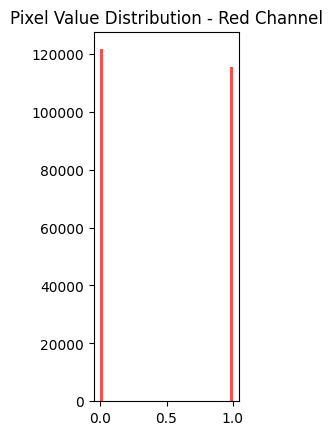

In [ ]:
# Plotting histograms for RGB channels
plt.subplot(1, 3, 1)
plt.hist(X_train[:, :, :, 0].flatten(), bins=50, color='red', alpha=0.7, label='Red', range=[0, 1])
plt.title('Pixel Value Distribution - Red Channel')

plt.show()

Text(0.5, 1.0, 'Pixel Value Distribution - Green Channel')

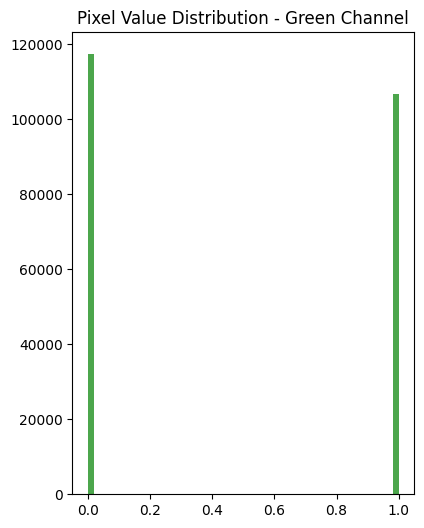

In [ ]:
# Plotting histograms for Green color channels
plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 2)
plt.hist(X_train[:, :, :, 1].flatten(), bins=50, color='green', alpha=0.7, label='Green', range=[0, 1])
plt.title('Pixel Value Distribution - Green Channel')


Text(0.5, 1.0, 'Pixel Value Distribution - Blue Channel')

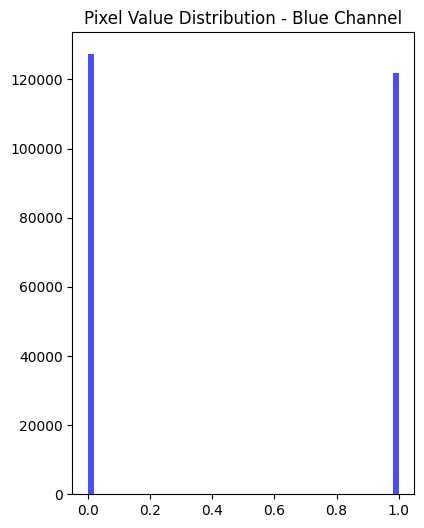

In [ ]:
# Plotting histograms for Blue color channels
plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 3)
plt.hist(X_train[:, :, :, 2].flatten(), bins=50, color='Blue', alpha=0.7, label='Blue', range=[0, 1])
plt.title('Pixel Value Distribution - Blue Channel')

In [ ]:
# Normalizing the Image Data
X_train = X_train / 255
X_test = X_test / 255

# Checking the data after normalization
X_train.shape


(50000, 32, 32, 3)

In [ ]:
# Encoding the Target Class
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Displaying the Encoded Target Classes
y_train
y_test



array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

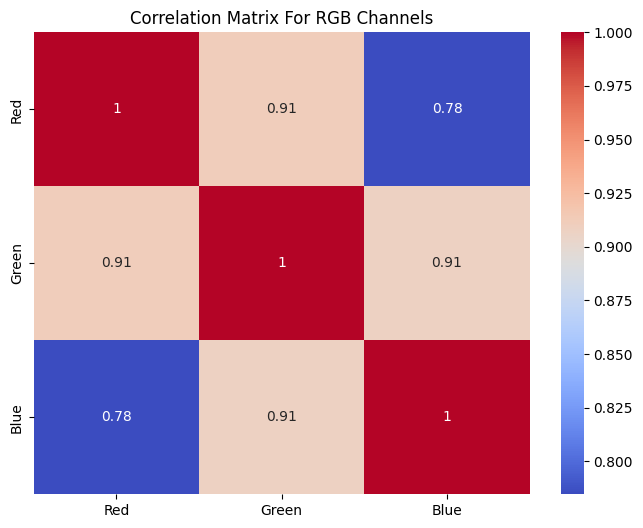

In [ ]:
# Calculate the correlation matrix for each color channel
red_channel = X_train[:, :, :, 0].reshape(-1)
green_channel = X_train[:, :, :, 1].reshape(-1)
blue_channel = X_train[:, :, :, 2].reshape(-1)

# Stack the channels along the last axis and compute the correlation matrix
channels_stacked = np.stack((red_channel, green_channel, blue_channel), axis=-1)
corr_matrix = np.corrcoef(channels_stacked, rowvar=False)

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, xticklabels=['Red', 'Green', 'Blue'], yticklabels=['Red', 'Green', 'Blue'], cmap='coolwarm')
plt.title('Correlation Matrix For RGB Channels')
plt.show()

In [ ]:
# Defining the Model Architecture
model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compiling the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the Model
history = model.fit(X_train, y_train, validation_split=0.2, batch_size=64, epochs=15)


Epoch 1/15
625/625 [==============================] - 9s 7ms/step - loss: 1.7115 - accuracy: 0.3713 - val_loss: 1.3770 - val_accuracy: 0.5128
Epoch 2/15
625/625 [==============================] - 3s 5ms/step - loss: 1.4099 - accuracy: 0.4912 - val_loss: 1.1957 - val_accuracy: 0.5852
Epoch 3/15
625/625 [==============================] - 3s 5ms/step - loss: 1.2895 - accuracy: 0.5380 - val_loss: 1.1178 - val_accuracy: 0.6134
Epoch 4/15
625/625 [==============================] - 3s 5ms/step - loss: 1.2162 - accuracy: 0.5674 - val_loss: 1.1016 - val_accuracy: 0.6199
Epoch 5/15
625/625 [==============================] - 3s 5ms/step - loss: 1.1556 - accuracy: 0.5891 - val_loss: 1.0573 - val_accuracy: 0.6337
Epoch 6/15
625/625 [==============================] - 3s 5ms/step - loss: 1.0992 - accuracy: 0.6119 - val_loss: 0.9794 - val_accuracy: 0.6616
Epoch 7/15
625/625 [==============================] - 3s 5ms/step - loss: 1.0690 - accuracy: 0.6227 - val_loss: 0.9518 - val_accuracy: 0.6714
Epoch 

In [ ]:
#Checking VGG  model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 7, 7, 32)          0         
                                                                 
 flatten (Flatten)           (None, 1568)              0

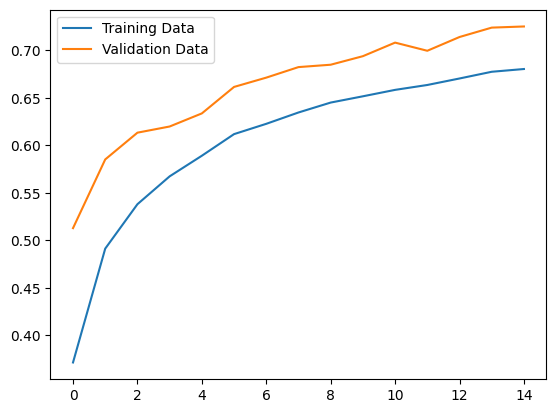

In [ ]:
# Checking for Overfitting
import matplotlib.pyplot as plt

# Plotting the Learning Curve
plt.plot(history.history['accuracy'], label='Training Data')
plt.plot(history.history['val_accuracy'], label='Validation Data')
plt.legend()
plt.show()

In [ ]:
# Evaluating the Model
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.8118 - accuracy: 0.7239


[0.8118468523025513, 0.7239000201225281]

In [ ]:
# Making Predictions
import numpy as np

prediction = model.predict(X_test)
predicted_labels = np.argmax(prediction, axis=1)

actual_labels = np.argmax(y_test, axis=1)


313/313 [==============================] - 1s 2ms/step


In [ ]:
# Generating Predictions and Actual Labels
import numpy as np

predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

actual_labels = np.argmax(y_test, axis=1)

# Checking the Classification Report
from sklearn import metrics
print(metrics.classification_report(actual_labels, predicted_labels))


313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.74      0.79      0.76      1000
           1       0.78      0.90      0.84      1000
           2       0.64      0.59      0.61      1000
           3       0.54      0.51      0.53      1000
           4       0.70      0.61      0.65      1000
           5       0.66      0.59      0.62      1000
           6       0.73      0.85      0.79      1000
           7       0.77      0.81      0.79      1000
           8       0.81      0.84      0.82      1000
           9       0.83      0.76      0.79      1000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000



Text(0.5, 1.0, 'Confusion Matrix - CNN Model')

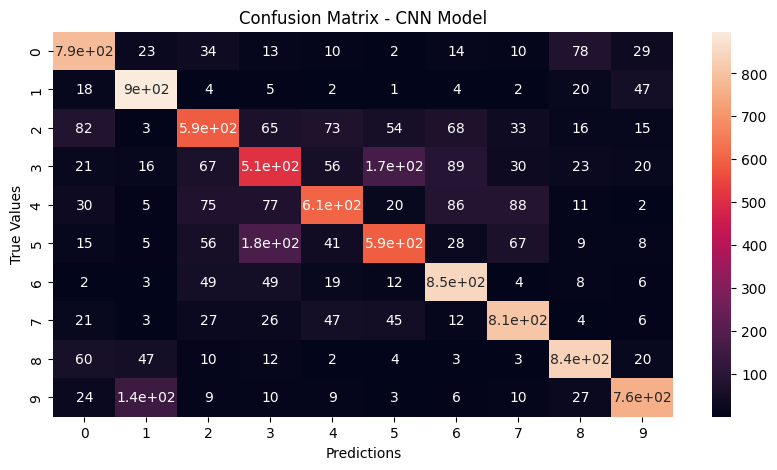

In [ ]:
# Plotting the Confusion Matrix
plt.figure(figsize=(10, 5))
confusion_matrix = metrics.confusion_matrix(actual_labels, predicted_labels)
import seaborn as sns
sns.heatmap(confusion_matrix, annot=True)
plt.ylabel('True Values')
plt.xlabel('Predictions')
plt.title('Confusion Matrix - CNN Model')


# TRANSFER LEARNING FOR IMAGE CLASSIFICATION

#### In the realm of image classification using transfer learning, the VGG16 pretrained model distinguishes itself as one of the top 5 models, showcasing outstanding accuracy in ImageNet classification. With training encompassing a diverse collection of 1000 images across 1000 distinct categories, the VGG16 model proves to be a formidable asset for our image classification endeavor.

In [ ]:
# Importing the VGG16 Pretrained Model and Associated Utilities
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf



In [ ]:
# Resizing CIFAR-10 images to a 64x64 resolution
X_train_resized = tf.image.resize(X_train, (84, 84))
X_test_resized = tf.image.resize(X_test, (84, 84))


In [ ]:
# Loading the VGG16 Model
VGG = VGG16(weights='imagenet', include_top=False, input_shape=(84, 84, 3))


In [ ]:
# Initializing a Sequential model
VGG_model = Sequential()

# Integrating the VGG pretrained model into our architecture
VGG_model.add(VGG)

# Adding the pretrained convolutional blocks to the output layer
VGG_model.add(Flatten())
VGG_model.add(Dense(512, activation='relu'))
VGG_model.add(Dense(256, activation='relu'))
VGG_model.add(Dense(10, activation='softmax'))

# Unfreezing the first 10 convolutional block of the pretrained model for fine-tuning
for layer in VGG.layers[:-5]:
    layer.trainable = False

# Compiling the model with a reduced learning rate for fine-tuning
VGG_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting the Model
VGG_model.fit(X_train_resized, y_train, validation_split=0.2, batch_size=32, epochs=15)


Epoch 1/15
1250/1250 [==============================] - 55s 41ms/step - loss: 0.8944 - accuracy: 0.6895 - val_loss: 0.6686 - val_accuracy: 0.7636
Epoch 2/15
1250/1250 [==============================] - 51s 41ms/step - loss: 0.5375 - accuracy: 0.8144 - val_loss: 0.5401 - val_accuracy: 0.8104
Epoch 3/15
1250/1250 [==============================] - 52s 41ms/step - loss: 0.4034 - accuracy: 0.8579 - val_loss: 0.4651 - val_accuracy: 0.8412
Epoch 4/15
1250/1250 [==============================] - 52s 42ms/step - loss: 0.3048 - accuracy: 0.8927 - val_loss: 0.4750 - val_accuracy: 0.8387
Epoch 5/15
1250/1250 [==============================] - 52s 42ms/step - loss: 0.2271 - accuracy: 0.9219 - val_loss: 0.4927 - val_accuracy: 0.8410
Epoch 6/15
1250/1250 [==============================] - 52s 42ms/step - loss: 0.1591 - accuracy: 0.9464 - val_loss: 0.4692 - val_accuracy: 0.8528
Epoch 7/15
1250/1250 [==============================] - 52s 42ms/step - loss: 0.1018 - accuracy: 0.9661 - val_loss: 0.4989 -

In [ ]:
#Checking VGG  model summary
VGG_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               1049088   
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dense_4 (Dense)             (None, 10)                2570      
                                                                 
Total params: 15897674 (60.64 MB)
Trainable params: 8262410 (31.52 MB)
Non-trainable params: 7635264 (29.13 MB)
_________________________________________________________________


In [ ]:
# Assessing the Pretrained VGG Model
VGG_model.evaluate(X_test_resized, y_test)


313/313 [==============================] - 8s 26ms/step - loss: 0.8203 - accuracy: 0.8607


[0.8202850818634033, 0.8607000112533569]

In [ ]:
# Obtaining Predictions using the Pretrained VGG Model on Resized Test Data
VGG_predictions = VGG_model.predict(X_test_resized)

# Preparing Labels for Confusion Matrix
VGG_predicted_labels = np.argmax(VGG_predictions, axis=1)
actual_labels = np.argmax(y_test, axis=1)


313/313 [==============================] - 8s 25ms/step


Text(0.5, 1.0, 'Confusion Matrix - VGG16 Model')

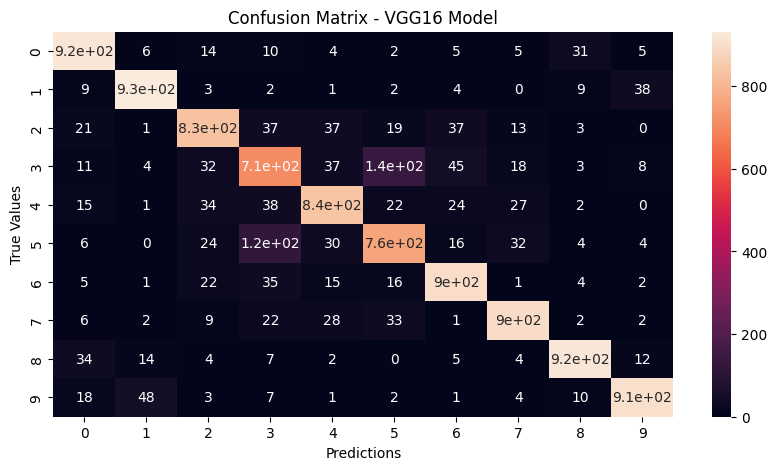

In [ ]:
# Plotting the Confusion Matrix for VGG16 Predictions
plt.figure(figsize=(10, 5))
conf_matrix = metrics.confusion_matrix(actual_labels, VGG_predicted_labels)
sns.heatmap(conf_matrix, annot=True)
plt.ylabel('True Values')
plt.xlabel('Predictions')
plt.title('Confusion Matrix - VGG16 Model')


Text(0.5, 1.0, 'Accuracy Performance:CNN Vs VGG16')

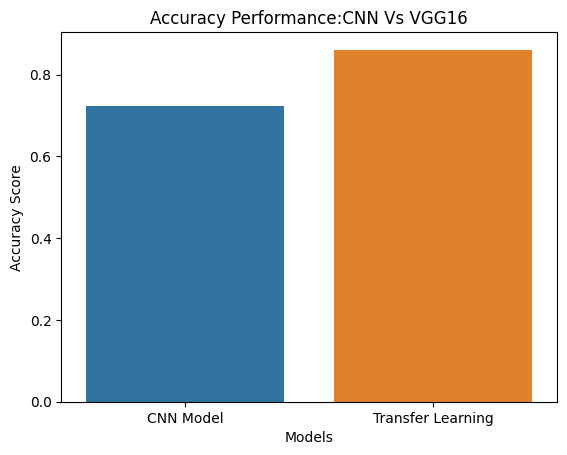

In [ ]:
# Computing the accuracy
VGG_Model_accuracy = metrics.accuracy_score(actual_labels, VGG_predicted_labels)
model_accuracy = metrics.accuracy_score(actual_labels, predicted_labels)

# Plotting the accuracy scores for comparison
scores = [model_accuracy, VGG_Model_accuracy]
names = ['CNN Model',  'Transfer Learning']

sns.barplot(y=scores, x=names)
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Performance:CNN Vs VGG16')